In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2021-10-05 16:40:04.809514: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-05 16:40:04.809567: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print("The shape of train_image, train_labels, test_images and test_labels are {}, {},{} & {}".format(
     train_images.shape, train_labels.shape, test_images.shape, test_labels.shape))

The shape of train_image, train_labels, test_images and test_labels are (60000, 28, 28), (60000,),(10000, 28, 28) & (10000,)


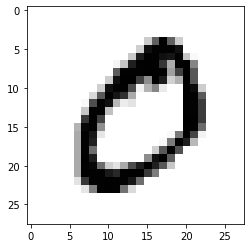

In [7]:
#Visualizating loaded data
digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
#Manipulating tensor images
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [10]:
#Creating a batch
batch = train_images[:128]

In [11]:
#Tensor reshaping
train_images_reshaped = train_images.reshape((60000, 28 * 28))
train_images_reshaped.shape


(60000, 784)

***Creating convnet layers***

In [12]:
train_x = train_images.reshape((60000, 28,28,1))
train_x  = train_x[:10000]
train_y = train_labels.astype('float32')/255
train_y  = train_y[:10000]
test_x = test_images.reshape((10000, 28,28,1))
test_y = test_labels.astype('float32')/255


In [13]:
model = keras.Sequential(([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(), 
    layers.Dense(64, activation = 'relu'), 
    layers.Dense(10, activation = 'softmax')
]))

2021-10-05 16:40:26.256506: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-05 16:40:26.256955: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-05 16:40:26.256982: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-05 16:40:26.257006: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (1cd76d885a23): /proc/driver/nvidia/version does not exist
2021-10-05 16:40:26.257265: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

***Training the convent layers***

In [29]:
# train_x = train_images.reshape((10000, 28, 28, 1))
# train_y = train_images.astype('float32') / 255
# test_x = test_images.reshape((100, 28, 28, 1))
# test_y = test_images.astype('float32') / 255

ValueError: cannot reshape array of size 47040000 into shape (10000,28,28,1)

In [14]:
train_y = to_categorical(train_y)
test_x = to_categorical(train_x)


In [15]:
model.compile(optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [16]:
model.fit(train_x, train_y, epochs=5, batch_size=64)

2021-10-05 16:40:33.114697: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-05 16:40:33.115879: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200215000 Hz


Epoch 1/5
157/157 [==============================] - 4s 25ms/step - loss: 1.0868 - accuracy: 0.9643
Epoch 2/5
157/157 [==============================] - 4s 24ms/step - loss: 4.7998e-12 - accuracy: 1.0000
Epoch 3/5
157/157 [==============================] - 4s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
157/157 [==============================] - 4s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
157/157 [==============================] - 4s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000


Reached 100% accuracy in five epochs. Let's check test accuracy

In [ ]:
classes = model.predict(test_x, batch_size=10)
print(classes)